In [43]:
import pandas as pd 
import numpy as np 

<h1>Aprendizaje de arboles de decision</h1>
<ul>
    <li> Objetivo: aprender un arbol de decision consistente con los ejemplos
    <li> Para posteriormente clasificar ejemplos nuevos
    <li> Ejemplos de conjuntos de entrenamiento:
</ul>

![Alt text](image.png)

<ul>
    <li><b>Features:</b> Cielo, Temperatura, Humedad, Viento
    <li><b>Label:</b> Jugar_tenis (La salida que queremos predecir)
    <li><b>Class:</b> +, -
</ul>

In [44]:

df = pd.read_csv("PlayTennis.csv")
df

,Cielo,Temperatura,Humedad,Viento,Jugar_tenis
0,Sol,Alta,Alta,Debil,-
1,Sol,Alta,Alta,Fuerte,-
2,Nubes,Alta,Alta,Debil,+
3,Lluvia,Suave,Alta,Debil,+
4,Lluvia,Baja,Normal,Debil,+
5,Lluvia,Baja,Normal,Fuerte,-
6,Nubes,Baja,Normal,Fuerte,+
7,Sol,Suave,Alta,Debil,-
8,Sol,Baja,Normal,Debil,+
9,Lluvia,Suave,Normal,Debil,+


<h3>ENTROPY </h3>

![Alt text](image-3.png)

<ul>
    <li>P= '+'
    <li>N= '-'
    <li>D= P+N + Total
</ul>

In [45]:
def find_entropy(df):
    #target column
    target = df.keys()[-1] # = Jugar_tenis
    entropy = 0
    values = df[target].unique() # = ['-', '+']
    #calc entropy
    for value in values: #itera ['-', '+']
        fraction = df[target].value_counts()[value]/len(df[target])
        entropy += -fraction*np.log2(fraction)
    return entropy

In [46]:
print( df['Jugar_tenis'].value_counts()['+'] )
print( len(df['Jugar_tenis']) )

9
14


In [47]:
find_entropy(df)

0.9402859586706311

<h3>AVERAGE INFORMATION</h3>

![Alt text](image-5.png)

In [48]:
def average_information(df, attribute):
    target = df.keys()[-1]   # Target column
    target_variables = df[target].unique()  # Unique target values ['-', '+']
    variables = df[attribute].unique()    # This gives different features in that attribute (like 'Hot','Cold' in attribute=Temperature)
    entropy2 = 0
    
    #The outer loop iterates over the unique values in the specified columns (variable represents a specific feature value within those columns).
    for variable in variables: #iterates in ['Hot', 'Cold'] for example
        entropy = 0
        
        #The inner loop iterates over the unique target variables ('+', '-').
        for target_variable in target_variables: 
            
            # Count the number of rows where the attribute matches 'variable' and the target matches 'target_variable'
            matching_rows = df[(df[attribute] == variable) & (df[target] == target_variable)]
            
            #print("\ntarget_variable:",target_variable, "\nattribute=", attribute, "\nvariable=", variable, '\nmatching_rows:\n',matching_rows, '\n \n \n')
            
            
            # Calculate 'num' as the count of matching rows
            num = len(matching_rows)
            
            # Count the total number of rows where the attribute matches 'variable'
            total_matching_rows = len(df[df[attribute] == variable])
            
            # Calculate 'den' as the count of total matching rows
            den = total_matching_rows
            
            # Calculate 'fraction' with 'eps' to avoid division by zero
            eps = 1e-5  # Small positive value to avoid division by zero
            fraction = num / (den + eps)
            
            # Calculate entropy contribution for this combination
            entropy += -fraction * np.log2(fraction + eps)

            #print("target_variable:",target_variable, " / attribute=", attribute, " / variable=", variable, " / num=", num, " / den=", den,
            #      "fraction=", fraction, "entropy", entropy, '\nmatching_rows:\n',matching_rows, '\n')
            
        fraction2 = den / len(df)
        
        # Accumulate the entropy contributions for different 'variable' values
        entropy2 += -fraction2 * entropy
    
    # Return the absolute value of 'entropy2' as the result
    return abs(entropy2)


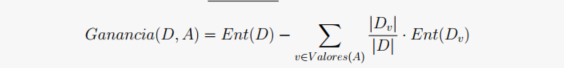

In [49]:
def find_winner(df):
    IG = []
    for key in df.keys()[:-1]: # ['Cielo', 'Temperatura', 'Humedad', 'Viento']
        IG.append(find_entropy(df)-average_information(df,key)) # prueba average_information para cada columna
    print(IG) #!!!!!!!!!!!!!! 
    return df.keys()[:-1][np.argmax(IG)]

In [50]:
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)

In [51]:
def buildTree(df,tree=None): 
    target = df.keys()[-1]   #target column
    
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
    #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[target],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

In [52]:
#build Tree
tree = buildTree(df)

[0.24677284704430968, 0.029250277440590056, 0.15186342018903565, 0.04815511674536155]
[2.791011613956229e-05, 0.020000013444066544, 0.020000013444066544, 0.9709419383204906]
[2.791011613956229e-05, 0.5709641359328611, 0.9709419383204906, 0.020000013444066544]


In [53]:
import pprint
pprint.pprint(tree)

{'Cielo': {'Lluvia': {'Viento': {'Debil': '+', 'Fuerte': '-'}},
           'Nubes': '+',
           'Sol': {'Humedad': {'Alta': '-', 'Normal': '+'}}}}


![Alt text](image-6.png)

In [54]:

df_1 = pd.read_csv("Figuras.csv")

df_1

,Color,Forma,Tamanio,Clase
0,Rojo,Cuadrado,Grande,+
1,Azul,Cuadrado,Grande,+
2,Rojo,Redondo,Pequenio,-
3,Verde,Cuadrado,Pequenio,-
4,Rojo,Redondo,Grande,+
5,Verde,Cuadrado,Grande,-


In [55]:
#build Tree
arbol = buildTree(df_1)

[0.5408680402788737, 2.737797669594144e-05, 0.4591685048344819]
[2.7105592701248682e-05, 0.2516469275466968, 0.9182910250349537]


In [56]:
import pprint
pprint.pprint(arbol)

{'Color': {'Azul': '+',
           'Rojo': {'Tamanio': {'Grande': '+', 'Pequenio': '-'}},
           'Verde': '-'}}


![Alt text](image-7.png)

====================================================

In [57]:
target = df.keys()[-1] 
target

'Jugar_tenis'

In [58]:
node = find_winner(df)
node

[0.24677284704430968, 0.029250277440590056, 0.15186342018903565, 0.04815511674536155]


'Cielo'

In [59]:
attValue = np.unique(df[node])
attValue

array(['Lluvia', 'Nubes', 'Sol'], dtype=object)

In [60]:
subtable = get_subtable(df,node,'Sol')
subtable

,Cielo,Temperatura,Humedad,Viento,Jugar_tenis
0,Sol,Alta,Alta,Debil,-
1,Sol,Alta,Alta,Fuerte,-
2,Sol,Suave,Alta,Debil,-
3,Sol,Baja,Normal,Debil,+
4,Sol,Suave,Normal,Fuerte,+


In [61]:
clValue,counts = np.unique(subtable['Jugar_tenis'],return_counts=True)


In [62]:
clValue

array(['+', '-'], dtype=object)

In [63]:
counts

array([2, 3], dtype=int64)

==== nivel 2

In [64]:
node_2 = find_winner(subtable)
node_2

[2.791011613956229e-05, 0.5709641359328611, 0.9709419383204906, 0.020000013444066544]


'Humedad'

In [65]:
attValue_2 = np.unique(subtable[node_2])
attValue_2

array(['Alta', 'Normal'], dtype=object)

In [66]:
subtable_2 = get_subtable(subtable,node_2,'Alta')
subtable_2

,Cielo,Temperatura,Humedad,Viento,Jugar_tenis
0,Sol,Alta,Alta,Debil,-
1,Sol,Alta,Alta,Fuerte,-
2,Sol,Suave,Alta,Debil,-
